In [ ]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from scipy.signal import savgol_filter

import os
import sklearn.ensemble

In [ ]:
data = pd.read_csv("parkinsons_updrs.data.csv")
data.drop(["motor_UPDRS"], axis=1, inplace=True)
data.drop(["subject#"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


In [ ]:
X = data.drop(["total_UPDRS"], axis=1) 

y = data.total_UPDRS.values

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls_reg = PLSRegression(n_components=10)
pls_reg.fit(x_train, y_train)


PLSRegression(n_components=10)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_pls_train = pls_reg.predict(x_train)
y_pred_pls_test = pls_reg.predict(x_test)

accuracy_pls_train = r2_score(y_train, y_pred_pls_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_pls_train)

accuracy_pls_test = r2_score(y_test, y_pred_pls_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_pls_test)

RMSE_pls_train = sqrt(mean_squared_error(y_train, y_pred_pls_train))
print("RMSE for Training Data: ", RMSE_pls_train)

RMSE_pls_test = sqrt(mean_squared_error(y_test, y_pred_pls_test))
print("RMSE for Testing Data: ", RMSE_pls_test)

Training Accuracy for Multiple Linear Regression Model:  0.17236001278531055
Testing Accuracy for Multiple Linear Regression Model:  0.18692298144871577
RMSE for Training Data:  9.666010105610514
RMSE for Testing Data:  9.911232155770305


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


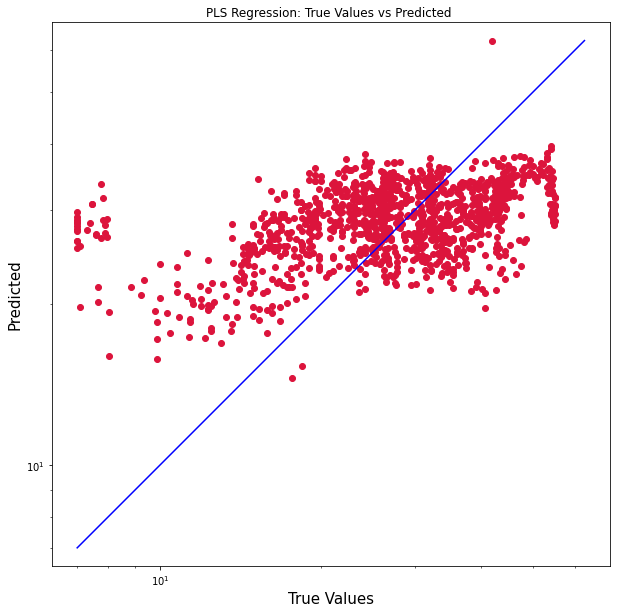

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_pls_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_pls_test), max(y_test))
p2 = min(min(y_pred_pls_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("PLS Regression: True Values vs Predicted ")
plt.axis('equal')
plt.show()